In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band08_wn_1380_1900',
                          'ng_7',
                          'g_ascending_k_descending',
                          'refPTs_P_1_T_250__P_5_T_250__P_10_T_250__P_300_T_250___P_500_T_250',
                          'ng_refs_2__1__1__1__2',
                          'getabsth_auto__auto__auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.2__all.2__all.2__all.2__all.2',
                          'wgt_flux_2',
                          'wgt_k_0',
                          'crd_b345cbe',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band08_wn_1380_1900',
                          'ng_7',
                          'g_ascending_k_descending',
                          'refPTs_P_1_T_250__P_5_T_250__P_10_T_250__P_300_T_250___P_500_T_250',
                          'ng_refs_2__1__1__1__2',
                          'getabsth_auto__auto__auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.2__all.2__all.2__all.2__all.2',
                          'wgt_flux_2',
                          'wgt_k_0',
                          'crd_b345cbe',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(range(1, 7 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 1380

nband = 520

nv = 200

dv = 0.005

tsfc = 294.0

ng = 7

nref = 5

p_refs = (/ 1,  5, 10, 300, 500 /)

t_refs = (/ 250, 250, 250, 250, 250 /)

ng_refs = 

data wgt
     &     /2*.2, .2, .2, .2, 2*.2/

option_wgt_flux = 2

option_wgt_k = 0

option_klin = 0

klin = 6.375563e-24

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

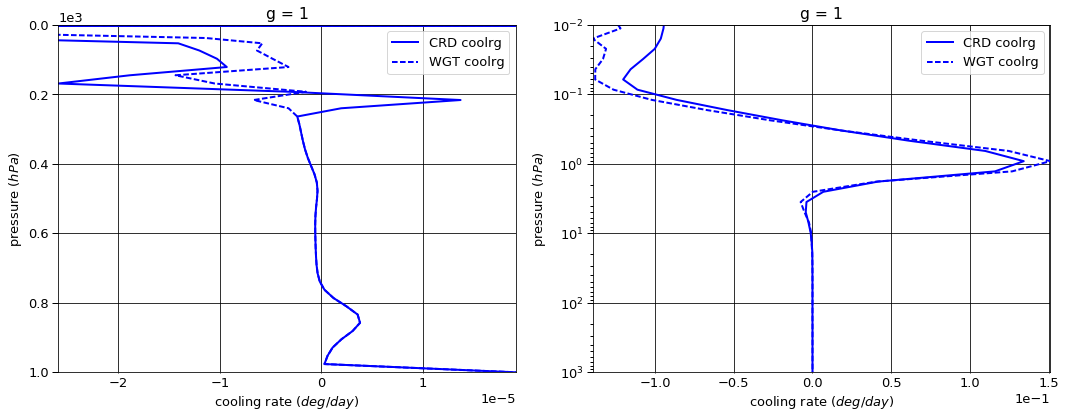

# Figure: cooling rate g-group 2

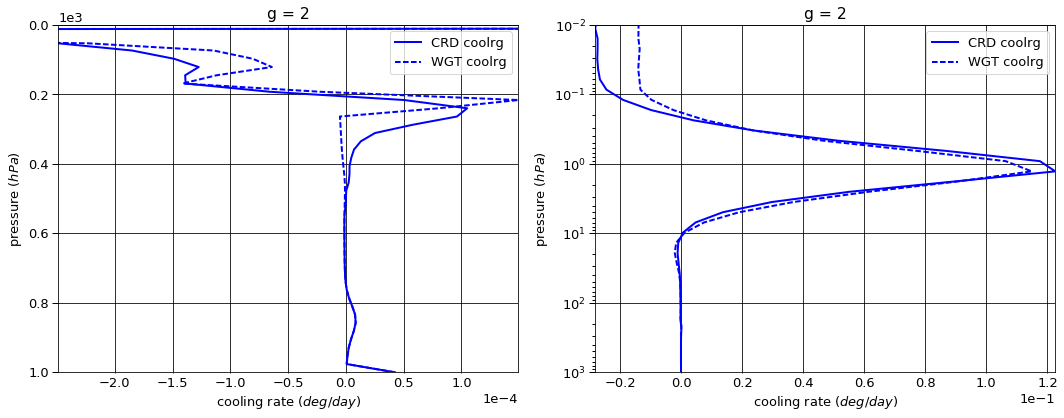

# Figure: cooling rate g-group 3

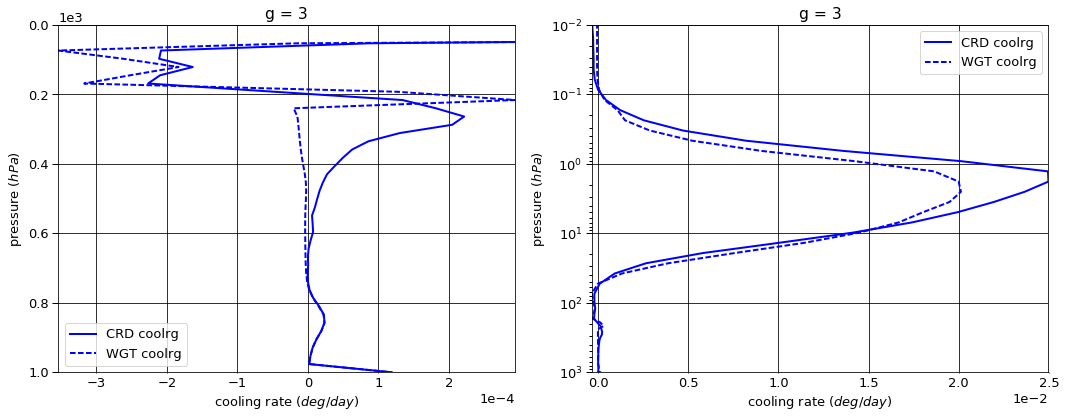

# Figure: cooling rate g-group 4

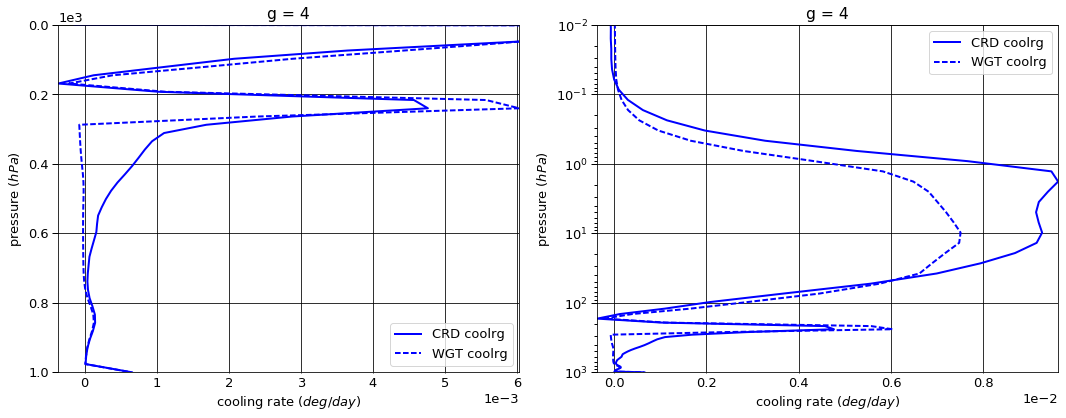

# Figure: cooling rate g-group 5

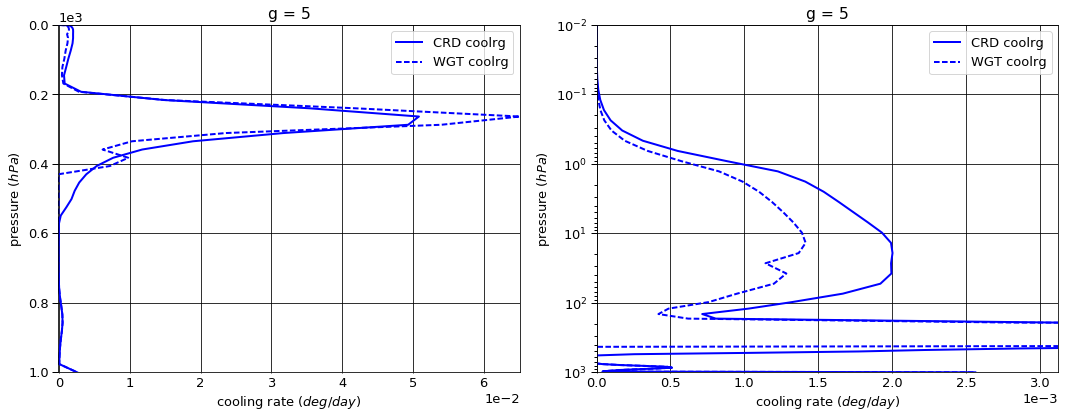

# Figure: cooling rate g-group 6

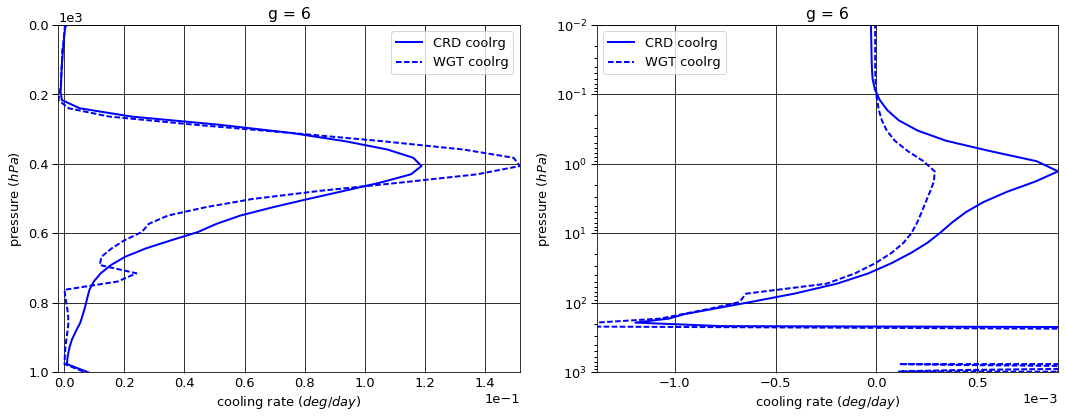

# Figure: cooling rate g-group 7

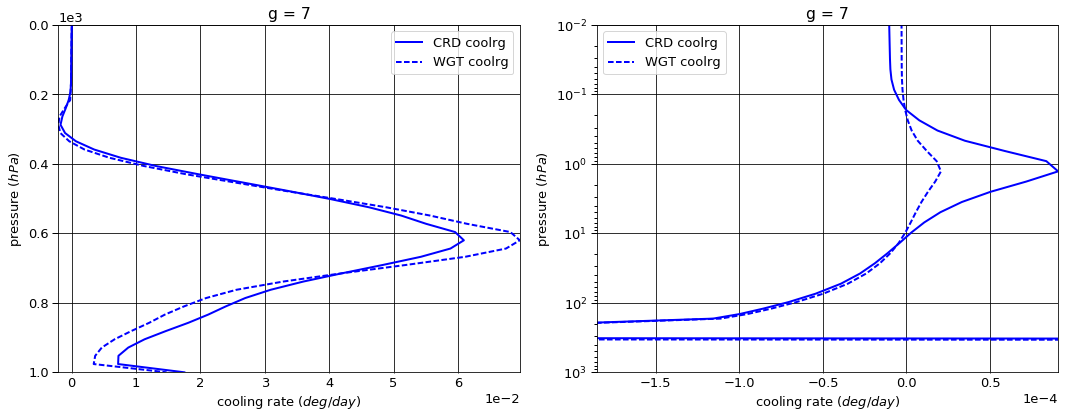

# Figure: cooling rate g-group total

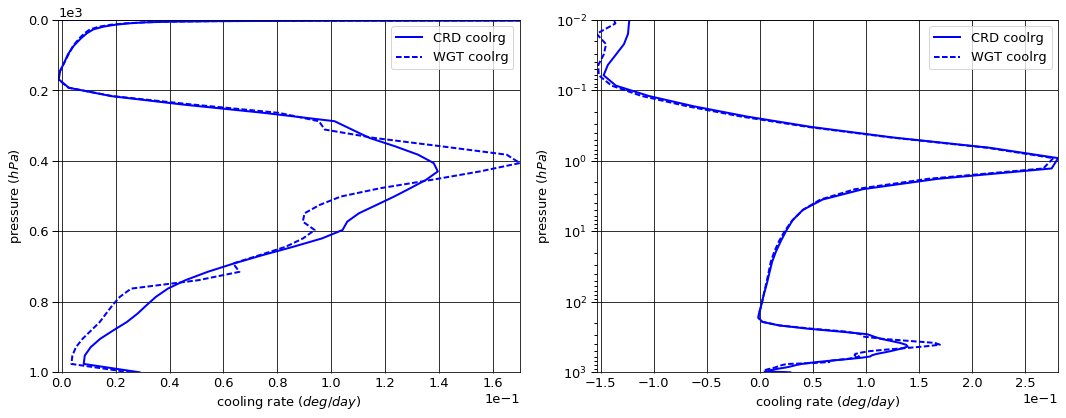

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg     fnetg
g pressure level                                
1 0.0      1      -0.013192  -0.000081 -0.013272
  1013.0   76     -0.046136   0.046083 -0.000054
2 0.0      1      -0.029752   0.000000 -0.029752
  1013.0   76     -0.102373   0.102254 -0.000119
3 0.0      1      -0.039829   0.000000 -0.039829
  1013.0   76     -0.287276   0.286941 -0.000334
4 0.0      1      -0.140946   0.000000 -0.140946
  1013.0   76     -1.569602   1.567763 -0.001839
5 0.0      1      -0.728582   0.000000 -0.728582
  1013.0   76     -6.185874   6.178685 -0.007189
6 0.0      1      -3.898966   0.000000 -3.898966
  1013.0   76    -16.884770  16.863345 -0.021425
7 0.0      1      -2.423634   0.000000 -2.423634
  1013.0   76     -5.653467   5.591608 -0.061859


WGT


flug       fldg     fnetg
g pressure level                                
1 0.0      1      -0.013309   0.000000 -0.013309
  1013.0   76     -0.046136   0.046083 -0.000054
2 0.0      1      -0.031012   0.000000 -0.031012
  1013.0   76     -0.102373   0.102254 -0.000119
3 0.0      1      -0.037891   0.000000 -0.037891
  1013.0   76     -0.287276   0.286941 -0.000334
4 0.0      1      -0.120287   0.000000 -0.120287
  1013.0   76     -1.569602   1.567778 -0.001825
5 0.0      1      -0.701363   0.000000 -0.701363
  1013.0   76     -6.185874   6.178685 -0.007189
6 0.0      1      -3.727140   0.000000 -3.727140
  1013.0   76    -16.884770  16.865173 -0.019597
7 0.0      1      -2.349867   0.000000 -2.349867
  1013.0   76     -5.653467   5.613144 -0.040323


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.000117  0.000081 -0.000037
  1013.0   76     0.000000  0.000000  0.000000
2 0.0      1     -0.001260  0.000000 -0.001260
  1013.0   76     0.000000  0.000000  0.000000
3 0.0      1      0.001937  0.000000  0.001937
  1013.0   76     0.000000  0.000000  0.000000
4 0.0      1      0.020660  0.000000  0.020660
  1013.0   76     0.000000  0.000015  0.000015
5 0.0      1      0.027219  0.000000  0.027219
  1013.0   76     0.000000  0.000000  0.000000
6 0.0      1      0.171825  0.000000  0.171825
  1013.0   76     0.000000  0.001828  0.001828
7 0.0      1      0.073767  0.000000  0.073767
  1013.0   76     0.000000  0.021536  0.021536

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.108360
  1001.112500 75     0.000019
2 0.000312    1     -0.028329
  1001.112500 75     0.000042
3 0.000312    1     -0.000392
  1001.112500 75     0.000119
4 0.000312    1     -0.000140
  1001.112500 75     0.000658
5 0.000312    1     -0.000002
  1001.112500 75     0.002564
6 0.000312    1     -0.000032
  1001.112500 75     0.007997
7 0.000312    1     -0.000011
  1001.112500 75     0.017497


WGT


coolrg
g pressure    layer              
1 0.000312    1     -1.372360e-01
  1001.112500 75     1.915468e-05
2 0.000312    1     -6.127244e-03
  1001.112500 75     4.238868e-05
3 0.000312    1     -6.240788e-05
  1001.112500 75     1.191569e-04
4 0.000312    1      5.129292e-06
  1001.112500 75     6.507280e-04
5 0.000312    1     -1.742383e-07
  1001.112500 75     2.563742e-03
6 0.000312    1     -7.065819e-06
  1001.112500 75     6.989062e-03
7 0.000312    1     -3.153395e-06
  1001.112500 75     1.474826e-02


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.028876
  1001.112500 75     0.000000
2 0.000312    1      0.022202
  1001.112500 75     0.000000
3 0.000312    1      0.000329
  1001.112500 75     0.000000
4 0.000312    1      0.000145
  1001.112500 75    -0.000007
5 0.000312    1      0.000001
  1001.112500 75     0.000000
6 0.000312    1      0.000025
  1001.112500 75    -0.001008
7 0.000312    1      0.000008
  1001.112500 75    -0.002748

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-7.274901,-0.000081,-7.274982
1013.0,76,-30.729499,30.636680,-0.092819



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-6.980870,0.000000,-6.98087
1013.0,76,-30.729499,30.660058,-0.06944



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.294031,0.000081,0.294112
1013.0,76,0.000000,0.023379,0.023379


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.137266
1001.112500,75,0.028896



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.143431
1001.112500,75,0.025132



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.006165
1001.112500,75,-0.003763


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.001452,0.001495
2,0.003240,0.003333
3,0.008981,0.009320
4,0.049096,0.050962
5,0.192894,0.200914
6,0.536442,0.550252
7,0.207885,0.183721


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.887171e-18
2,1.278086e-19
3,2.712675e-20
4,2.412401e-21
5,3.204560e-21
6,2.406835e-22
7,1.086608e-23


In [21]:
def spreadsheet():
    ng = 7
    ng_refs = [2, 1, 1, 1, 2]
    p_refs = [1, 5, 10, 300, 500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,2.887171e-18,NaN,0.001452,0.001495,0.001452,0.001495,1.0
2,1.278086e-19,0.044268,0.003240,0.003333,0.004692,0.004828,1.0
3,2.712675e-20,0.212245,0.008981,0.009320,0.013673,0.014148,5.0
4,2.412401e-21,0.088931,0.049096,0.050962,0.062769,0.065110,10.0
5,3.204560e-21,1.328370,0.192894,0.200914,0.255663,0.266024,300.0
6,2.406835e-22,0.075107,0.536442,0.550252,0.792106,0.816276,500.0
7,1.086608e-23,0.045147,0.207885,0.183721,0.999990,0.999997,500.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog         ratio
layer g                                                       
1     1     0.000312  1.284203e-17  8.096439e-18  1.586133e+00
      2     0.000312  4.829622e-19  2.126743e-20  2.270900e+01
      3     0.000312  7.060583e-21  3.347495e-28  2.109214e+07
      4     0.000312  6.312471e-22  8.260080e-26  7.642143e+03
      5     0.000312  6.085319e-24  7.973158e-27  7.632256e+02
      6     0.000312  8.815137e-24  6.328350e-28  1.392960e+04
      7     0.000312  4.441198e-24  6.595400e-29  6.733781e+04
2     1     0.000750  1.284314e-17  8.105630e-18  1.584472e+00
      2     0.000750  4.844972e-19  3.127798e-20  1.549004e+01
      3     0.000750  7.095594e-21  1.101611e-26  6.441107e+05
      4     0.000750  6.329775e-22  5.559880e-25  1.138473e+03
      5     0.000750  6.119112e-24  2.912627e-26  2.100891e+02
      6     0.000750  8.831990e-24  2.079475e-27  4.247221e+03
      7     0.000750  4.445273e-24  2.208920e-28  2.012419e+04
3     1     0.001052  1.284558e-17  8.125004e-18  1.580993e+00
      2     0.001052  4.877202e-19  4.973000e-20  9.807363e+00
      3     0.001052  7.159516e-21  4.472100e-25  1.600929e+04
      4     0.001052  6.360620e-22  9.115435e-25  6.977856e+02
      5     0.001052  6.158288e-24  4.279639e-26  1.438974e+02
      6     0.001052  8.865908e-24  3.309100e-27  2.679250e+03
      7     0.001052  4.453928e-24  3.406659e-28  1.307418e+04
4     1     0.001476  1.284801e-17  8.145352e-18  1.577342e+00
      2     0.001476  4.911505e-19  2.018026e-19  2.433817e+00
      3     0.001476  7.229740e-21  6.107679e-23  1.183713e+02
      4     0.001476  6.394674e-22  1.689010e-24  3.786047e+02
      5     0.001476  6.205606e-24  6.179861e-26  1.004166e+02
      6     0.001476  8.902761e-24  5.328882e-27  1.670662e+03
      7     0.001476  4.463361e-24  5.560289e-28  8.027209e+03
5     1     0.002070  1.285026e-17  8.165556e-18  1.573715e+00
      2     0.002070  4.946072e-19  2.069981e-19  2.389429e+00
      3     0.002070  7.303761e-21  1.232598e-22  5.925503e+01
      4     0.002070  6.430825e-22  4.132593e-24  1.556124e+02
      5     0.002070  6.262312e-24  9.294964e-26  6.737317e+01
      6     0.002070  8.940860e-24  7.500776e-27  1.191991e+03
      7     0.002070  4.473101e-24  7.631066e-28  5.861698e+03
6     1     0.002904  1.285233e-17  8.185596e-18  1.570115e+00
      2     0.002904  4.980915e-19  2.115296e-19  2.354713e+00
      3     0.002904  7.382716e-21  2.712625e-22  2.721613e+01
      4     0.002904  6.469728e-22  6.149391e-24  1.052092e+02
      5     0.002904  6.332000e-24  1.288757e-25  4.913262e+01
      6     0.002904  8.980431e-24  1.031959e-26  8.702316e+02
      7     0.002904  4.483162e-24  1.041802e-27  4.303276e+03
7     1     0.004074  1.285417e-17  8.205475e-18  1.566536e+00
      2     0.004074  5.016099e-19  2.159654e-19  2.322640e+00
      3     0.004074  7.468277e-21  3.422333e-22  2.182218e+01
      4     0.004074  6.512334e-22  8.433039e-24  7.722405e+01
      5     0.004074  6.419750e-24  1.775962e-25  3.614801e+01
      6     0.004074  9.021833e-24  1.410850e-26  6.394610e+02
      7     0.004074  4.493572e-24  1.422539e-27  3.158839e+03
8     1     0.005714  1.285577e-17  8.225195e-18  1.562975e+00
      2     0.005714  5.051712e-19  2.204796e-19  2.291237e+00
      3     0.005714  7.562787e-21  4.307088e-22  1.755893e+01
      4     0.005714  6.559978e-22  1.115140e-23  5.882650e+01
      5     0.005714  6.532679e-24  2.449020e-25  2.667467e+01
      6     0.005714  9.065565e-24  1.928328e-26  4.701257e+02
      7     0.005714  4.504370e-24  1.946820e-27  2.313707e+03
9     1     0.008015  1.285707e-17  8.244761e-18  1.559423e+00
      2     0.008015  5.087887e-19  2.251756e-19  2.259519e+00
      3     0.008015  7.669539e-21  5.422280e-22  1.414449e+01
      4     0.008015  6.614533e-22  1.475487e-23  4.482949e+01
      5     0.008015  6.680779e-24  3.379902e-25  1.976619e+01
      6     0.008015  9.112331e-24  2.63586

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
